https://github.com/AutoViML/Auto_ViML/raw/master/logo.png

Auto_ViML fue diseñado para construir modelos interpretables de alto rendimiento con la menor cantidad de variables. La "V" en Auto_ViML significa Variable porque prueba múltiples modelos con múltiples funciones para encontrar el modelo de mejor rendimiento para su conjunto de datos. La "i" en Auto_ViML significa "interpretable" ya que Auto_ViML selecciona la menor cantidad de características necesarias para construir un modelo más simple e interpretable. En la mayoría de los casos, Auto_ViML crea modelos con un 20-99% menos de funciones que un modelo de rendimiento similar con todas las funciones incluidas (esto se basa en mis pruebas. Su experiencia puede variar).



red: https://github.com/AutoViML/Auto_ViML


In [4]:
!pip install -qq autoviml

     |████████████████████████████████| 125 kB 36.9 MB/s 
     |████████████████████████████████| 173.5 MB 13 kB/s 
     |████████████████████████████████| 125 kB 74.3 MB/s 
     |████████████████████████████████| 76.3 MB 63 kB/s 
     |████████████████████████████████| 564 kB 45.3 MB/s 
     |████████████████████████████████| 170 kB 61.8 MB/s 


In [3]:
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/NestorBalich/IA-ML/main/dfscopus.csv"
data_original = pd.read_csv(url, encoding='latin-1', sep=',')

url = "https://raw.githubusercontent.com/NestorBalich/IA-ML/main/df1_cluster_stemi.csv"
cluster_estemi = pd.read_csv(url, encoding='latin-1', sep=',')

In [5]:
cluster_estemi.columns

Index(['doi', 'subtype', 'creator', 'affilname', 'publicationName',
       'aggregationType', 'include?', 'proc_pubmed_id', 'proc_abstract',
       'proc_title', 'text_to_proc'],
      dtype='object')

In [6]:
# chequeo no tenga duplicados
cluster_estemi[cluster_estemi["doi"].duplicated() == True].count()

doi                0
subtype            0
creator            0
affilname          0
publicationName    0
aggregationType    0
include?           0
proc_pubmed_id     0
proc_abstract      0
proc_title         0
text_to_proc       0
dtype: int64

En el caso de las herramiente d auto ML es posible entregarles los datos sin procesar (nomalizar o tokenizar , etc) por ello vamos a tomar como base los mismo registros utilizados para train y testo pero sin ningun tipo de procesamient.

In [7]:
#trae todos los datos de data_original cuyo doi coincide con cluster_estemi['doi']
churn_df = data_original.merge(cluster_estemi['doi'], how='inner')

In [ ]:
churn_df.head()

,doi,pubmed_id,title,subtype,subtypeDescription,creator,affilname,affiliation_city,affiliation_country,publicationName,aggregationType,volume,pageRange,citedby_count,abstract,include?
0,10.5755/j01.eee.18.9.2825,NaN,The LEGO NXT robot-based e-learning environmen...,ar,Article,Burbaite R.,Kaunas University of Technology,Kaunas,Lithuania,Elektronika ir Elektrotechnika,Journal,18,113-116,12,It is difficult to motivate learners to learn ...,SI
1,10.1080/03043797.2012.725711,NaN,Embedded C programming: A practical course int...,ar,Article,Laverty D.,Queen's University Belfast,Belfast,United Kingdom,European Journal of Engineering Education,Journal,37,557-574,3,This paper presents a new laboratory-based mod...,NO
2,10.1007/s00779-011-0404-2,NaN,Tangible interaction and learning: The case fo...,ar,Article,Horn M.,Northwestern University,Evanston,United States,Personal and Ubiquitous Computing,Journal,16,379-389,128,Research involving tangible interaction and ch...,SI
3,10.1007/s13218-011-0148-1,NaN,Integration of programming and learning in a c...,ar,Article,Kirsch A.,"FakultÃ¤t fÃ¼r Informatik, Technische Universi...",Garching bei Munchen,Germany,KI - Kunstliche Intelligenz,Journal,26,79-82,0,Zusammenfassung\n\nDurch den zunehmenden Einsa...,NO
4,10.1007/s10015-011-0996-7,NaN,An educational tool for interactive parallel a...,ar,Article,Pagliarini L.,Technical University of Denmark;Accademia di b...,Lyngby;Macerata,Denmark;Italy,Artificial Life and Robotics,Journal,16,441-447,1,In this article we try to describe how the mod...,NO


In [12]:
# extraemos proporsion igual
train_df =pd.concat([churn_df[churn_df['include?']=="SI"][0:30],churn_df[churn_df['include?']=="NO"][0:30]], axis=0 )

#Seleccion de UnSeen.
test_df = churn_df[~churn_df.index.isin(train_df.index)]
print(train_df.shape)
print(train_df.groupby("include?")['include?'].count())
print("-"*20)
print(test_df.shape)
print(test_df.groupby("include?")['include?'].count())

(60, 16)
include?
NO    30
SI    30
Name: include?, dtype: int64
--------------------
(146, 16)
include?
NO    91
SI    55
Name: include?, dtype: int64


In [ ]:
train_df.head()

,doi,pubmed_id,title,subtype,subtypeDescription,creator,affilname,affiliation_city,affiliation_country,publicationName,aggregationType,volume,pageRange,citedby_count,abstract,include?
0,10.5755/j01.eee.18.9.2825,NaN,The LEGO NXT robot-based e-learning environmen...,ar,Article,Burbaite R.,Kaunas University of Technology,Kaunas,Lithuania,Elektronika ir Elektrotechnika,Journal,18,113-116,12,It is difficult to motivate learners to learn ...,SI
2,10.1007/s00779-011-0404-2,NaN,Tangible interaction and learning: The case fo...,ar,Article,Horn M.,Northwestern University,Evanston,United States,Personal and Ubiquitous Computing,Journal,16,379-389,128,Research involving tangible interaction and ch...,SI
7,10.1109/TE.2012.2190071,NaN,Algorithmic Bricks: A tangible robot programmi...,ar,Article,Kwon D.,Korea University,Seoul,South Korea,IEEE Transactions on Education,Journal,55,474-479,24,Tangible programming tools enable children to ...,SI
12,10.1080/08993408.2013.847152,NaN,Mindstorms robots and the application of cogni...,ar,Article,Mason R.,School of Business and Tourism,Lismore,Australia,Computer Science Education,Journal,23,296-314,13,This paper reports on a series of introductory...,SI
13,10.1080/08993408.2013.847226,NaN,Robotics for computer scientists: what's the b...,ar,Article,Touretzky D.,Carnegie Mellon University,Pittsburgh,United States,Computer Science Education,Journal,23,349-367,8,"Modern robots, like todayâs smartphones, are...",SI


In [13]:
from autoviml.Auto_ViML import Auto_ViML

In [14]:
target='include?'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (60, 16)
    Training Set Memory Usage = 0.01 MB
Test Set Shape = (146, 16)
    Test Set Memory Usage = 0.02 MB
Single_Label Target: ['include?']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
          NO:      30  ->   50.0%
          SI:      30  ->   50.0%
String or Multi Class target: include? transformed as follows: {'NO': 0, 'SI': 1}
Alert! Rare Class is not 1 but 0 in this data set
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Numbe

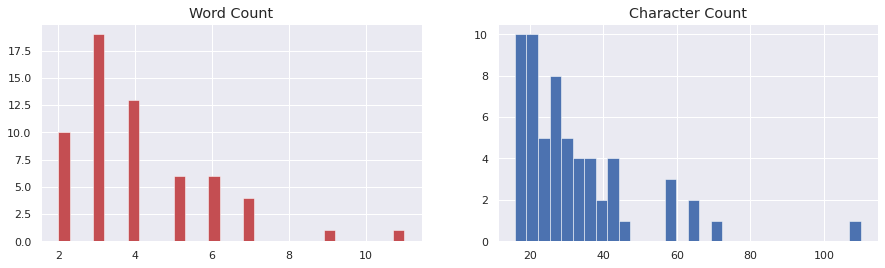

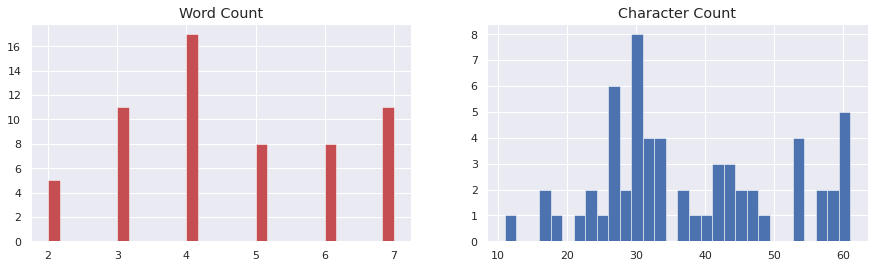

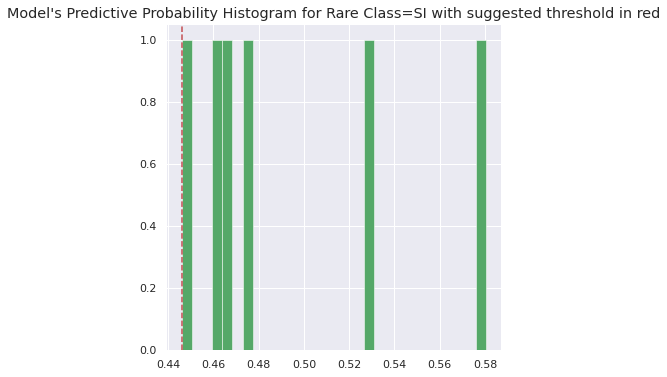

    Using threshold=0.5. However, 0.446 provides better F1=0.67 for rare class...
########################################################
Forests Model Prediction Results on Held Out CV Data Set:
    OOB Score = 0.611
    Regular Accuracy Score = 33.3%
Balanced Accuracy = 50.00% with Threshold = 0.50
Confusion Matrix:
[[1 2]
 [1 2]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.50      0.67      0.57         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6

Balanced Accuracy = 66.67% with Threshold = 0.45
Confusion Matrix:
[[1 2]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.80      0.67    

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 50.0%
    Balanced Accuracy = 50.0%
    Precision         = 0.0%
    Average Precision = 25.0%
    Recall            = 0.0%
    F1 Score          = 0.0%
#####################################################
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       0.00      0.00      0.00         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6

[[3 0]
 [3 0]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


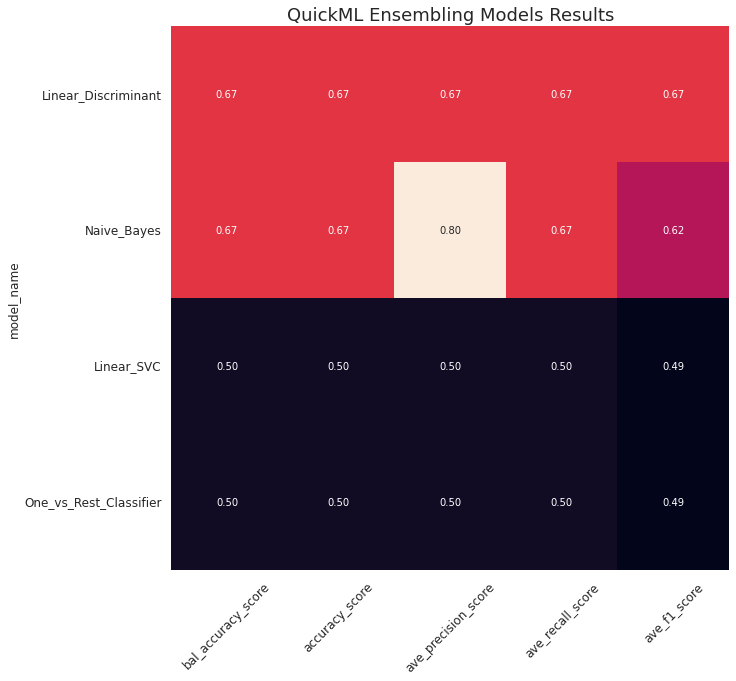

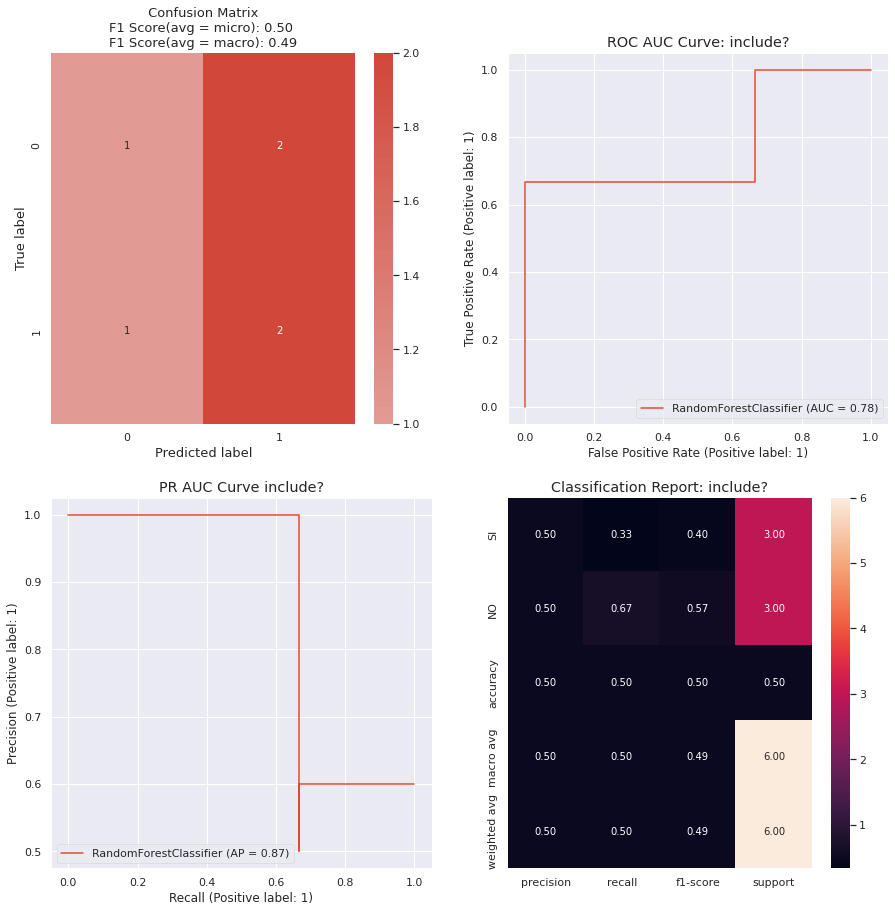

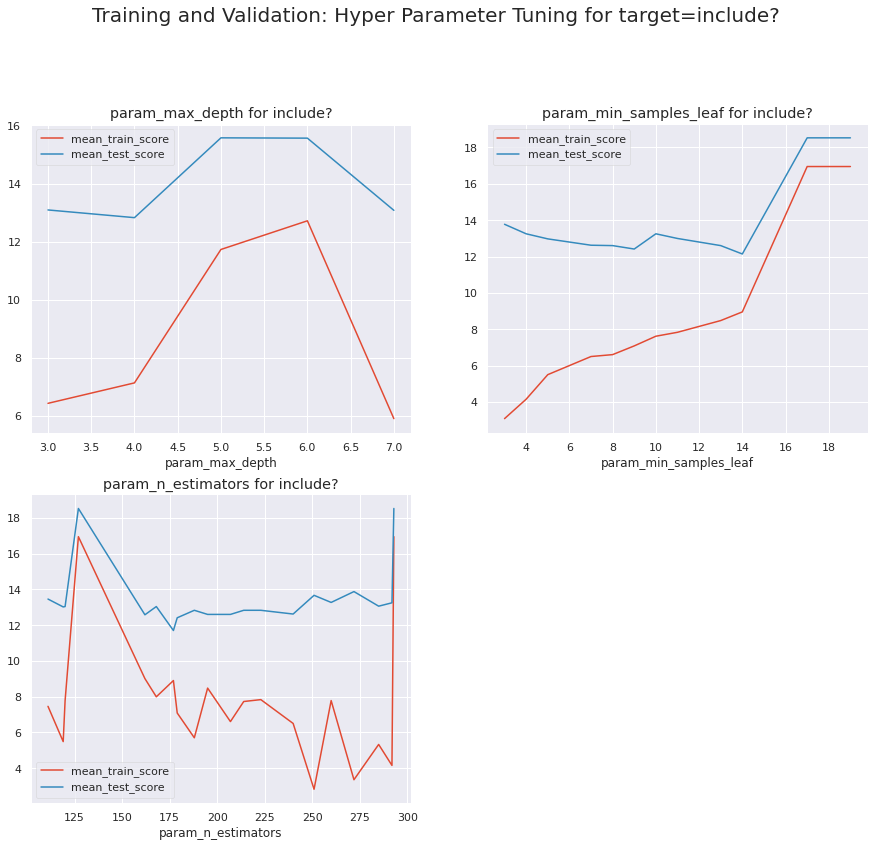

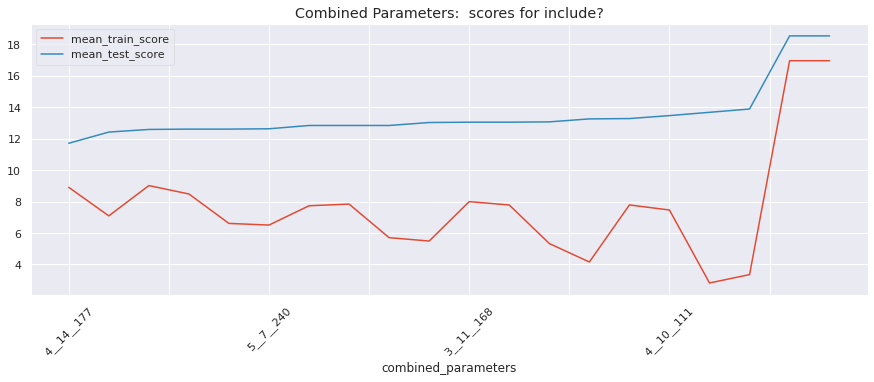

    Time taken for this Target (in seconds) = 144
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
     Actual Training time taken in seconds = 0
Training of models completed. Now starting predictions on test data...
    Making test Data predictions using modified Threshold = 0.446
    Calculating weighted average ensemble of 5 classifiers
########################################################
Completed Ensemble predictions on held out data
    Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 144
Writing Output files to disk...
    Saving predictions to ./include?/include?_Binary_Classification_test_modified.csv
    Saving predictions to ./include?/include?_Binary_Classificati

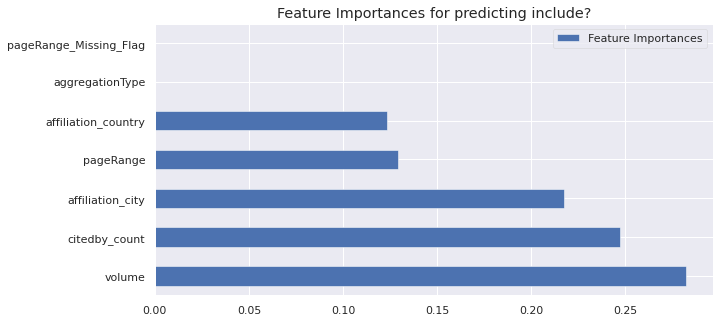

In [15]:
# 
# Boosting_Flag = None         modelo lineal.
# Boosting_Flag = False        modelo de bosque aleatorio 
# Boosting_Flag = True         modelo XGBoost
# Boosting_Flag = "CatBoost"   modelo complejo pero de alto rendimiento
# Binning_Flag = True mejora un modelo CatBoost ya que se agrega a la lista de variables categóricas en los datos

model, features, trainm, testm = Auto_ViML(train_df, target, test_df, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='RS',feature_reduction=False,
                                    Boosting_Flag=False ,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=False, 
                                    verbose=1)

hyper_param: Tuning options are GridSearch ('GS') and RandomizedSearch ('RS'). Default is 'GS'.

feature_reduction: Default = 'True' but it can be set to False if you don't want automatic    

Boosting Flag: you have 4 possible choices (default is False):                               
  None = This will build a Linear Model                                                  
  False = This will build a Random Forest or Extra Trees model (also known as Bagging)        
  True = This will build an XGBoost model                                                     
  CatBoost = THis will build a CatBoost model (provided you have CatBoost installed)          



In [16]:
features

['affiliation_city',
 'affiliation_country',
 'aggregationType',
 'volume',
 'pageRange',
 'pageRange_Missing_Flag',
 'citedby_count']

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
testm

In [19]:
testm.columns

Index(['doi', 'title', 'creator', 'abstract', 'affiliation_city',
       'affiliation_country', 'aggregationType', 'volume', 'pageRange',
       'pageRange_Missing_Flag', 'citedby_count', 'include?_proba_SI',
       'include?_proba_NO', 'include?_predictions',
       'include?_Linear_Discriminant_predictions',
       'include?_Linear_SVC_predictions', 'include?_Naive_Bayes_predictions',
       'include?_One_vs_Rest_Classifier_predictions',
       'include?_Forests_predictions', 'include?_Ensembled_predictions'],
      dtype='object')

In [20]:
 print(confusion_matrix(test_df[target].values,testm['include?_Linear_Discriminant_predictions'].values))
 print(classification_report(test_df[target].values,testm['include?_Linear_Discriminant_predictions'].values))

[[47 44]
 [25 30]]
              precision    recall  f1-score   support

          NO       0.65      0.52      0.58        91
          SI       0.41      0.55      0.47        55

    accuracy                           0.53       146
   macro avg       0.53      0.53      0.52       146
weighted avg       0.56      0.53      0.53       146



In [34]:
 print(confusion_matrix(test_df[target].values,testm['include?_Naive_Bayes_predictions'].values))
 print(classification_report(test_df[target].values,testm['include?_Naive_Bayes_predictions'].values))

[[68 23]
 [29 26]]
              precision    recall  f1-score   support

          NO       0.70      0.75      0.72        91
          SI       0.53      0.47      0.50        55

    accuracy                           0.64       146
   macro avg       0.62      0.61      0.61       146
weighted avg       0.64      0.64      0.64       146



In [32]:
 print(confusion_matrix(test_df[target].values,testm['include?_Linear_SVC_predictions'].values))
 print(classification_report(test_df[target].values,testm['include?_Linear_SVC_predictions'].values))

[[41 50]
 [24 31]]
              precision    recall  f1-score   support

          NO       0.63      0.45      0.53        91
          SI       0.38      0.56      0.46        55

    accuracy                           0.49       146
   macro avg       0.51      0.51      0.49       146
weighted avg       0.54      0.49      0.50       146



In [33]:
 print(confusion_matrix(test_df[target].values,testm['include?_Forests_predictions'].values))
 print(classification_report(test_df[target].values,testm['include?_Forests_predictions'].values))

[[42 49]
 [21 34]]
              precision    recall  f1-score   support

          NO       0.67      0.46      0.55        91
          SI       0.41      0.62      0.49        55

    accuracy                           0.52       146
   macro avg       0.54      0.54      0.52       146
weighted avg       0.57      0.52      0.53       146



In [24]:
print(confusion_matrix(test_df[target].values,testm['include?_Ensembled_predictions'].values))
print(classification_report(test_df[target].values,testm['include?_Ensembled_predictions'].values))

[[68 23]
 [40 15]]
              precision    recall  f1-score   support

          NO       0.63      0.75      0.68        91
          SI       0.39      0.27      0.32        55

    accuracy                           0.57       146
   macro avg       0.51      0.51      0.50       146
weighted avg       0.54      0.57      0.55       146



In [25]:
print(confusion_matrix(test_df[target].values,testm['include?_Ensembled_predictions'].values))
print(classification_report(test_df[target].values,testm['include?_Ensembled_predictions'].values))

[[68 23]
 [40 15]]
              precision    recall  f1-score   support

          NO       0.63      0.75      0.68        91
          SI       0.39      0.27      0.32        55

    accuracy                           0.57       146
   macro avg       0.51      0.51      0.50       146
weighted avg       0.54      0.57      0.55       146

